1.0 Project Problem Definition : SALES PREDICTION

2.0 Preparing the Data

2.1 Import the Dependency

In [1]:
# Importing the needed modules for this project
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2.2 Loading the Data

In [2]:
# load the dataset for this project
df = pd.read_csv("C:/Users/FASANXI SODIQ/codesoft project datasets/advertising.csv ")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


2.3 Exploratory Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

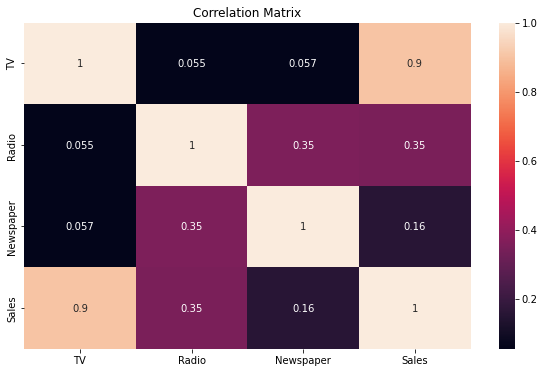

In [7]:
# plot the correlation matrix.
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')

2.4 Cleaning the Data

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.duplicated().sum()

0

2.5 Features Engineering/Features Transformation

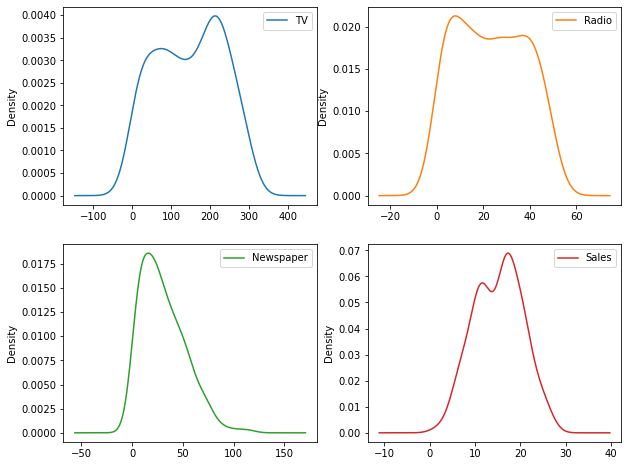

In [10]:
# check for normal distribution of data.
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.gcf().set_size_inches(10,8)
plt.show()

In [11]:
# split the data into train_set and test_set
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X = df.drop(['Sales'], axis = 1).values
Y = df['Sales'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=0)
print("X_train :", x_train.shape)
print("X_test :", x_test.shape)
print("Y_train :", y_train.shape)
print("Y_test:", y_test.shape)

X_train : (180, 3)
X_test : (20, 3)
Y_train : (180,)
Y_test: (20,)


2.6 Models Building/Evaluation 

LINEAR REGRESSOR MODEL:

In [12]:
# model building
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)
reg_y_pred = linear_reg_model.predict(x_test)
reg_ypred = np.round(reg_y_pred , 0)
# evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from numpy import sqrt
reg_MSE = mean_squared_error(y_test, reg_y_pred)
reg_RMSE = sqrt(reg_MSE)
reg_score = r2_score(y_test, reg_y_pred)
print("Linear Regression MSE :",reg_MSE)
print("Linear Regression RMSE :",reg_RMSE)
print("Linear Regression R2_Score :", reg_score) 



Linear Regression MSE : 5.983451754343359
Linear Regression RMSE : 2.4461095139718005
Linear Regression R2_Score : 0.8139952560607195


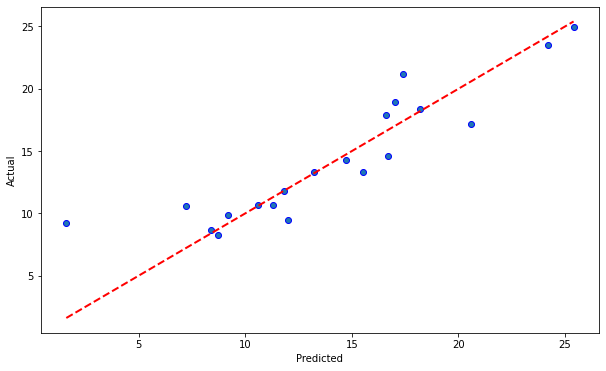

In [13]:
fig, ax = plt.subplots()
ax.scatter(y_test, reg_y_pred, edgecolors=(0,0,1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--',lw=2)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
plt.show()

In [14]:
# comparing predicted with actual sales
col = ['predicted sales', 'actual Sales']
result = pd.DataFrame(list(zip(reg_ypred, y_test)), columns=col)
result.head()

,predicted sales,actual Sales
0,11.0,11.3
1,9.0,8.4
2,9.0,12.0
3,25.0,25.4
4,15.0,16.7


In [15]:
correct_prediction = [ ]
wrong_prediction = [ ]
def percentage_error_calculator(prediction, test):
    for i, j in list(zip(prediction, test)) :
        if i == j: correct_prediction.append(i)              
        else: wrong_prediction.append(i)
        total_correct_prediction = len(correct_prediction)
        wrong_correct_prediction = len(wrong_prediction)                
        percentage_error = round((len(correct_prediction) - len(y_test))/ len(y_test)*100,0)
    return percentage_error    
percentage_error_calculator(reg_ypred, y_test)

-100.0

SUPPORT VECTOR REGRESSOR MODEL:

In [16]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)
svm_y_pred = svr_model.predict(x_test)
svm_ypred = np.round(svm_y_pred , 0)
svm_MSE = mean_squared_error(y_test, svm_y_pred)
svm_RMSE = sqrt(svm_MSE)
svm_score = r2_score(y_test, svm_y_pred)
print("Support Vector Regression MSE :",svm_MSE)
print("Support Vector Regression RMSE :",svm_RMSE)
print("Support Vector Regression R2_Score :", reg_score)

Support Vector Regression MSE : 5.275242603383094
Support Vector Regression RMSE : 2.2967896297621806
Support Vector Regression R2_Score : 0.8139952560607195


In [17]:
# comparing predicted with actual sales
col = ['predicted sales', 'actual Sales']
result = pd.DataFrame(list(zip(svm_ypred, y_test)), columns=col)
result.head()

,predicted sales,actual Sales
0,11.0,11.3
1,9.0,8.4
2,11.0,12.0
3,21.0,25.4
4,16.0,16.7


DECISION TREE REGRESSOR MODEL:

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state = 0)
dtr_model.fit(x_train, y_train)
dtr_y_pred = dtr_model.predict(x_test)
dtr_ypred = np.round(dtr_y_pred , 0)
dtr_MSE = mean_squared_error(y_test, dtr_y_pred)
dtr_RMSE = sqrt(dtr_MSE)
dtr_score = r2_score(y_test, dtr_y_pred)
print("Decision Tree Regression MSE :",dtr_MSE)
print("Decision Tree Regression RMSE :",dtr_RMSE)
print("Decision Tree Regression R2_Score :", dtr_score)

Decision Tree Regression MSE : 5.339499999999999
Decision Tree Regression RMSE : 2.3107358135451137
Decision Tree Regression R2_Score : 0.8340134806731166


In [19]:
percentage_error_calculator(dtr_ypred, y_test)

-95.0

In [20]:
# comparing predicted with actual sales
col = ['predicted sales', 'actual Sales']
result = pd.DataFrame(list(zip(dtr_ypred, y_test)), columns=col)
result.head()

,predicted sales,actual Sales
0,11.0,11.3
1,10.0,8.4
2,9.0,12.0
3,26.0,25.4
4,17.0,16.7


RANDOM FOREST REGRESSOR:

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)
rfr_y_pred = rfr_model.predict(x_test)
rfr_ypred = np.round(rfr_y_pred , 0)
rfr_MSE = mean_squared_error(y_test, rfr_y_pred)
rfr_RMSE = sqrt(rfr_MSE)
rfr_score = r2_score(y_test, rfr_y_pred)
print("Random Forest Regression MSE :",rfr_MSE)
print("Random Forest Regression RMSE :",rfr_RMSE)
print("Random Forest Regression R2_Score :", rfr_score)

Random Forest Regression MSE : 1.82391620000001
Random Forest Regression RMSE : 1.3505244166619166
Random Forest Regression R2_Score : 0.9433007769300651


In [22]:
# comparing predicted with actual rating
col = ['predicted sales', 'actual Sales']
result = pd.DataFrame(list(zip(rfr_ypred, y_test)), columns=col)
result.head()

,predicted sales,actual Sales
0,11.0,11.3
1,9.0,8.4
2,11.0,12.0
3,26.0,25.4
4,17.0,16.7


In [23]:
from numpy import set_printoptions 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, QuantileTransformer
dfArr = df.values
labels = df.columns
col = labels[:3]
x = dfArr[:, :3]
y = dfArr[:, -1]

In [24]:
# scaling the training sets
sts = StandardScaler()
standized_x = sts.fit_transform(x)
set_printoptions(precision=4)


standized_df = pd.DataFrame(standized_x, columns = col)
standized_df['Sales'] = y
standized_df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,12.0
3,0.052050,1.217855,1.286405,16.5
4,0.394182,-0.841614,1.281802,17.9


In [25]:
# split the data into train_set and test_set
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X1 = standized_df.drop(['Sales'], axis = 1).values
Y1 = standized_df['Sales'].values
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.05, random_state= 42)
print("X_train :", x_train.shape)
print("X_test :", x_test.shape)
print("Y_train :", y_train.shape)
print("Y_test:", y_test.shape)

X_train : (190, 3)
X_test : (10, 3)
Y_train : (190,)
Y_test: (10,)


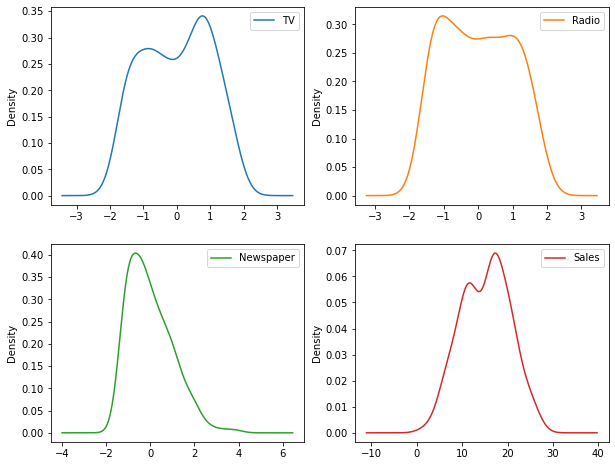

In [26]:
# check for normal distribution of data.
standized_df.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.gcf().set_size_inches(10,8)
plt.show()

In [27]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(x_train, y_train)
rfr_y_pred = rfr_model.predict(x_test)
rfr_ypred = np.round(rfr_y_pred , 0)
rfr_MSE = mean_squared_error(y_test, rfr_y_pred)
rfr_RMSE = sqrt(rfr_MSE)
rfr_score = r2_score(y_test, rfr_y_pred)
print("Random Forest Regression MSE :",rfr_MSE)
print("Random Forest Regression RMSE :",rfr_RMSE)
print("Random Forest Regression R2_Score :", rfr_score)

Random Forest Regression MSE : 0.8770422999999997
Random Forest Regression RMSE : 0.9365053657080666
Random Forest Regression R2_Score : 0.9729461571206476


In [28]:
# comparing predicted with actual Sales
col = ['predicted sales', 'actual Sales']
result = pd.DataFrame(list(zip(rfr_ypred, y_test)), columns=col)
result.head(50)

,predicted sales,actual Sales
0,18.0,16.9
1,23.0,22.4
2,20.0,21.4
3,7.0,7.3
4,23.0,24.7
5,13.0,12.6
6,22.0,22.3
7,9.0,8.4
8,17.0,16.5
9,17.0,16.1


In [29]:
# model building
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)
reg_y_pred = linear_reg_model.predict(x_test)
reg_ypred = np.round(reg_y_pred , 0)
# evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from numpy import sqrt
reg_MSE = mean_squared_error(y_test, reg_y_pred)
reg_RMSE = sqrt(reg_MSE)
reg_score = r2_score(y_test, reg_y_pred)
print("Linear Regression MSE :",reg_MSE)
print("Linear Regression RMSE :",reg_RMSE)
print("Linear Regression R2_Score :", reg_score) 

Linear Regression MSE : 2.4155728852505995
Linear Regression RMSE : 1.5542113386700662
Linear Regression R2_Score : 0.9254875970050773


In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state = 0)
dtr_model.fit(x_train, y_train)
dtr_y_pred = dtr_model.predict(x_test)
dtr_ypred = np.round(dtr_y_pred , 0)
dtr_MSE = mean_squared_error(y_test, dtr_y_pred)
dtr_RMSE = sqrt(dtr_MSE)
dtr_score = r2_score(y_test, dtr_y_pred)
print("Decision Tree Regression MSE :",dtr_MSE)
print("Decision Tree Regression RMSE :",dtr_RMSE)
print("Decision Tree Regression R2_Score :", dtr_score)

Decision Tree Regression MSE : 1.3820000000000003
Decision Tree Regression RMSE : 1.1755849607748479
Decision Tree Regression R2_Score : 0.9573698887051798


In [31]:
# scaling the training sets
mm = MinMaxScaler()
mm_x = mm.fit_transform(standized_x)
set_printoptions(precision=4)
col2 = labels[:3]

mm_df = pd.DataFrame(mm_x, columns = col2)
mm_df['Sales'] = y
mm_df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,12.0
3,0.509976,0.832661,0.511873,16.5
4,0.609063,0.217742,0.510994,17.9


In [32]:
# scaling the training sets
qt =  QuantileTransformer(n_quantiles=100, output_distribution='normal')
qt_x = qt.fit_transform(mm_x)
set_printoptions(precision=4)
col1 = labels[:3]

qt_df = pd.DataFrame(qt_x, columns = col1)
qt_df['Sales'] = y
qt_df.head()

,TV,Radio,Newspaper,Sales
0,0.871891,0.779611,1.555492,22.1
1,-0.963820,0.876818,0.689739,10.4
2,-1.549706,1.528952,1.558697,12.0
3,0.014928,1.013880,1.195720,16.5
4,0.211277,-0.612813,1.182023,17.9


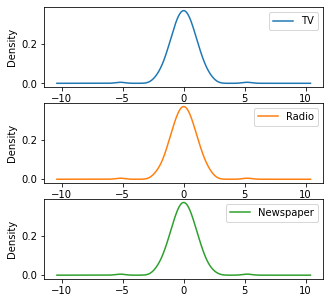

In [242]:
# check for normal distribution of data.
qt_df.drop(['Sales'], axis = 1).plot(kind='density', subplots=True, layout=(3,1), sharex=False)
plt.gcf().set_size_inches(5,5)
plt.show()

In [243]:
# split the data into train_set and test_set
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X0 = qt_df.drop(['Sales'], axis = 1).values
Y0 = qt_df['Sales'].values
x_train, x_test, y_train, y_test = train_test_split(X0, Y0, test_size = 0.05, random_state=0)
print("X_train :", x_train.shape)
print("X_test :", x_test.shape)
print("Y_train :", y_train.shape)
print("Y_test:", y_test.shape)

X_train : (190, 3)
X_test : (10, 3)
Y_train : (190,)
Y_test: (10,)


In [244]:
# model building
from sklearn.linear_model import LinearRegression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)
reg_y_pred = linear_reg_model.predict(x_test)
reg_ypred = np.round(reg_y_pred , 0)
# evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from numpy import sqrt
reg_MSE = mean_squared_error(y_test, reg_y_pred)
reg_RMSE = sqrt(reg_MSE)
reg_score = r2_score(y_test, reg_y_pred)
print("Linear Regression MSE :",reg_MSE)
print("Linear Regression RMSE :",reg_RMSE)
print("Linear Regression R2_Score :", reg_score) 



Linear Regression MSE : 3.5348509491563087
Linear Regression RMSE : 1.8801199294609663
Linear Regression R2_Score : 0.8812617038855661


In [245]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state = 0)
dtr_model.fit(x_train, y_train)
dtr_y_pred = dtr_model.predict(x_test)
dtr_ypred = np.round(dtr_y_pred , 0)
dtr_MSE = mean_squared_error(y_test, dtr_y_pred)
dtr_RMSE = sqrt(dtr_MSE)
dtr_score = r2_score(y_test, dtr_y_pred)
print("Decision Tree Regression MSE :",dtr_MSE)
print("Decision Tree Regression RMSE :",dtr_RMSE)
print("Decision Tree Regression R2_Score :", dtr_score)

Decision Tree Regression MSE : 1.0789999999999993
Decision Tree Regression RMSE : 1.038749247893831
Decision Tree Regression R2_Score : 0.9637555802634187


In [246]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)
svm_y_pred = svr_model.predict(x_test)
svm_ypred = np.round(svm_y_pred , 0)
svm_MSE = mean_squared_error(y_test, svm_y_pred)
svm_RMSE = sqrt(svm_MSE)
svm_score = r2_score(y_test, svm_y_pred)
print("Support Vector Regression MSE :",svm_MSE)
print("Support Vector Regression RMSE :",svm_RMSE)
print("Support Vector Regression R2_Score :", reg_score)

Support Vector Regression MSE : 4.870951206861692
Support Vector Regression RMSE : 2.207023155035237
Support Vector Regression R2_Score : 0.8812617038855661


In [247]:
# improving the performance of RF. 
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=71, oob_score= 'TRUE', n_jobs = 1, random_state = 2)
rfr_model.fit(x_train, y_train)
rfr_y_pred = rfr_model.predict(x_test)
rfr_ypred = np.round(rfr_y_pred , 1)
rfr_MSE = mean_squared_error(y_test, rfr_y_pred)
rfr_RMSE = sqrt(rfr_MSE)
rfr_score = r2_score(y_test, rfr_y_pred)
print("Random Forest Regression MSE :",rfr_MSE)
print("Random Forest Regression RMSE :",rfr_RMSE)
print("Random Forest Regression R2_Score :", rfr_score)

Random Forest Regression MSE : 0.3584247173179954
Random Forest Regression RMSE : 0.5986858252188667
Random Forest Regression R2_Score : 0.9879602447651168


In [248]:
# comparing predicted with actual sales
col = ['predicted sales', 'actual Sales']
result = pd.DataFrame(list(zip(rfr_ypred, y_test)), columns=col)
result

,predicted sales,actual Sales
0,11.2,11.3
1,9.4,8.4
2,11.4,12.0
3,25.4,25.4
4,17.0,16.7
5,9.8,8.7
6,7.5,7.2
7,17.8,18.2
8,8.9,9.2
9,17.4,16.6


In [44]:
metrics_name =  ['LR' ,'SVM', 'DTR', 'RFR']
idx = ['Mean Square Error', 'Root Mean Square Error','R2_Score']
mse_list = [reg_MSE, svm_MSE, dtr_MSE, rfr_MSE]
rmse_list =  [reg_RMSE, svm_RMSE, dtr_RMSE, rfr_RMSE]
r2_score_list =   [reg_score, svm_score, dtr_score, rfr_score]
df_metrics = pd.DataFrame([ mse_list,rmse_list,r2_score_list], columns =metrics_name, index=idx).T
df_metrics.sort_values(by='R2_Score', ascending=False)

,Mean Square Error,Root Mean Square Error,R2_Score
RFR,0.358425,0.598686,0.987960
DTR,1.079000,1.038749,0.963756
LR,3.534851,1.880120,0.881262
SVM,4.870951,2.207023,0.836381
